In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics.pairwise import cosine_similarity
import scipy as scp

In [3]:
data_folder = Path(r'C:\Users\Mohammad-A.Musa\Notebooks\Recommendation systems datasets\MAL dataset cleaned')

### Importing the full dataset

In [ ]:
user_ratings_df=pd.read_csv(r'C:\Users\Mohammad-A.Musa\Notebooks\Recommendation systems datasets\MAL dataset cleaned\user_ratings_matrix_including_Rai_light.csv')
#user_ratings_df=user_ratings_df.set_index('username')

In [ ]:
user_ratings_df.head()

In [ ]:
user_ratings_df=user_ratings_df.loc[:5000,:]

user_ratings_df.to_csv('Feather_user_ratings_df.csv')  #writing a lighter version of the main dataset due to limiation of main memory

### Importing the lighter dataset

In [4]:
user_ratings_df=pd.read_csv('Feather_user_ratings_df.csv') #reading the csv file
user_ratings_df=user_ratings_df.set_index('username')
user_ratings_df=user_ratings_df.drop(columns=['Unnamed: 0'])
user_ratings_df.head()

,1,5,6,7,8,15,16,17,18,19,...,37896,37976,37999,38101,38186,38524,38671,38778,39057,39826
username,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
----phoebelyn,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
---L-AND-AME-4EV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--AnimeBoy--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--Etsuko--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_ratings_df.to_pickle('Feather_user_ratings_df.pkl') #file size is bigger by using pickle

### Normalizing the ratings

In [5]:
user_ratings_norm=user_ratings_df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
user_ratings_norm.fillna(0,inplace=True)
#user_ratings_norm=user_ratings_norm.loc[:, (user_ratings_norm != 0).any(axis=0)]   #removing users with no ratings
user_ratings_norm.head()

,1,5,6,7,8,15,16,17,18,19,...,37896,37976,37999,38101,38186,38524,38671,38778,39057,39826
username,,,,,,,,,,,,,,,,,,,,,
NaN,-0.469136,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.469136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
----phoebelyn,-0.174257,0.825743,0.0,0.0,0.0,0.0,0.0,0.0,-0.174257,-0.174257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
---L-AND-AME-4EV,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--AnimeBoy--,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--Etsuko--,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating cosine similarity of user-user and item-item

In [6]:
item_sim=cosine_similarity(user_ratings_norm.T)
user_sim=cosine_similarity(user_ratings_norm)

In [7]:
item_sim_df=pd.DataFrame(item_sim,index=user_ratings_norm.columns,columns=user_ratings_norm.columns)
user_sim_df=pd.DataFrame(user_sim,index=user_ratings_norm.index,columns=user_ratings_norm.index)

In [8]:
item_sim_df.head()
user_sim_df.head()

username,nan,----phoebelyn,---L-AND-AME-4EV,--AnimeBoy--,--Etsuko--,--FallenAngel--,--Kin--,--N--,--PHOENIX--,--RIE--,...,AnotherNovaR,AnotherOne1,AnotherReader,AnotherWinter,AnotherWish,Another_Nobody,Another_Umbrella,Anotherfan,Anotherx,Anowser
username,,,,,,,,,,,,,,,,,,,,,
NaN,1.000000,-1.060539e-02,2.428984e-02,-0.003644,-0.023905,2.196917e-03,-0.036791,0.034530,0.008396,0.006374,...,0.019332,0.108027,-0.010851,-0.009920,0.105555,0.100526,0.022960,0.010217,0.078496,0.051552
----phoebelyn,-0.010605,1.000000e+00,2.786174e-18,0.007199,-0.007590,-3.563629e-02,-0.057154,-0.039914,0.032661,-0.026416,...,0.001361,-0.035528,-0.006855,-0.030612,0.013674,-0.009927,-0.014788,-0.063950,0.012730,-0.074886
---L-AND-AME-4EV,0.024290,2.786174e-18,1.000000e+00,0.084039,0.058097,-8.297195e-19,-0.044577,0.012868,0.000000,0.084036,...,0.073076,0.074249,0.051307,0.050849,0.025382,0.010445,0.092799,0.045706,0.027806,0.000000
--AnimeBoy--,-0.003644,7.199440e-03,8.403910e-02,1.000000,-0.004700,1.686186e-02,-0.046608,0.044755,0.030566,0.433299,...,0.039636,-0.030126,-0.048998,0.039001,0.018378,0.007133,0.019400,0.009296,0.043911,-0.008100
--Etsuko--,-0.023905,-7.589936e-03,5.809665e-02,-0.004700,1.000000,-8.736797e-04,-0.003217,0.079845,0.000000,-0.001240,...,-0.008510,0.027616,0.019927,-0.016949,0.025575,0.053364,0.024721,0.047703,-0.056942,-0.005940


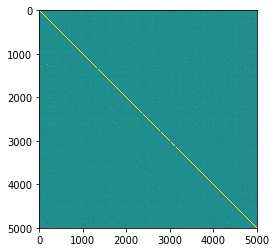

In [9]:
%matplotlib inline     #getting a visual on how the analogue looks like
import matplotlib.pyplot as plt

plt.imshow(user_sim)

### Function to find anime name:

In [10]:
%time
def anime_id_converter(id_no):
    #id_no=input(prompt='id_no= ')
    
    file_to_open = data_folder / 'anime_cleaned'/ 'anime_cleaned.csv'    #importing the anime_df file
    anime_df=pd.read_csv(file_to_open)
    
    current_anime=anime_df[anime_df['anime_id']==int(id_no)]
    current_anime=current_anime.loc[:,'title'].tolist()
    return current_anime[0]
if __name__=='__main__':
    print(anime_id_converter('5114'))

Wall time: 0 ns
Fullmetal Alchemist: Brotherhood


### Function to find top similar anime compared to given anime:

In [11]:
def top_animes(anime_name):
    count = 1
    print('Similar shows to {} include:\n'.format(anime_id_converter(anime_name)))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:6]:   #sort dataframe by the given anime_name from largest to smallest
        print('Anime, {}: {}'.format(count, anime_id_converter(item)))                    #then take the index since the index contains the id of the anime
        count +=1  
        
if __name__=='__main__':
    top_animes('5114')

Similar shows to Fullmetal Alchemist: Brotherhood include:

Anime, 1: Shingeki no Kyojin
Anime, 2: Death Note
Anime, 3: Code Geass: Hangyaku no Lelouch R2
Anime, 4: Code Geass: Hangyaku no Lelouch
Anime, 5: Fullmetal Alchemist


### Function to find similar users compared to given username:

In [12]:
def top_users(user):
    
    if user not in user_ratings_df.index:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values)
    for user, sim in zipped:
        print('User {0}, Similarity value: {1:.2f}'.format(user, sim)) 
        
if __name__=='__main__':
    top_users('----phoebelyn')

Most Similar Users:

User ACRONUS, Similarity value: 0.22
User Anndz, Similarity value: 0.17
User 5fps, Similarity value: 0.12
User Animu, Similarity value: 0.11
User AmandaTheGreat, Similarity value: 0.11
User AmamiRiku, Similarity value: 0.10
User AitchTee, Similarity value: 0.10
User Alface, Similarity value: 0.10
User All3n, Similarity value: 0.09
User AniManGa1993, Similarity value: 0.09


### Function to find anime recommended by similar users to a given username:

In [13]:
def similar_user_recs(user,n=5):
    
    if user not in user_ratings_df.index:
        print('No data available on user {}'.format(user))
        return 0
    
    sim_users=user_sim_df.sort_values(by=user, ascending=False).index[1:11]       #Getting the most similar users
    print('The user {} is similar to these users: {}'.format(user,sim_users.tolist()))
    best=[]
    most_common={}
    
    for i in sim_users:                                    #Getting the best anime rated by the most similar users.
        max_score = user_ratings_df.loc[i, :].max()
        for k in user_ratings_df.columns:
            if user_ratings_df.loc[i,k]==max_score:
                best.append(k)
    
        
    file_to_open = data_folder / 'anime_cleaned'/ 'anime_cleaned.csv'    #importing the anime_df file
    anime_df=pd.read_csv(file_to_open)
    
    
    best_df=pd.DataFrame(best)                            #Getting the names of the anime from the anime_df
    best_df=pd.DataFrame(best_df[0].value_counts())
    #print(best_df)
    for z in (best_df.index[0:n].tolist()):
        print('\nRecommended show:')
        print('anime_id, {}:'.format(z))
        print('{} and appears for {} times in top similar users.\n'.format(anime_id_converter(str(z)),best_df.loc[str(z),0]))
    #print('Recommendations are based on these users {}'.format((sim_users).tolist()))
    

if __name__=='__main__':
    similar_user_recs('----phoebelyn')

The user ----phoebelyn is similar to these users: ['ACRONUS', 'Anndz', '5fps', 'Animu', 'AmandaTheGreat', 'AmamiRiku', 'AitchTee', 'Alface', 'All3n', 'AniManGa1993']

Recommended show:
anime_id, 1689:
Byousoku 5 Centimeter and appears for 3 times in top similar users.


Recommended show:
anime_id, 1:
Cowboy Bebop and appears for 2 times in top similar users.


Recommended show:
anime_id, 245:
Great Teacher Onizuka and appears for 2 times in top similar users.


Recommended show:
anime_id, 1579:
Kiniro no Corda: Primo Passo and appears for 2 times in top similar users.


Recommended show:
anime_id, 4181:
Clannad: After Story and appears for 1 times in top similar users.



### Function to find anime the user haven't watch yet based on similar users

In [14]:
def similar_user_recs_new(user,n=5):
    
    if user not in user_ratings_df.index:
        print('No data available on user {}'.format(user))
        return 0
    
    sim_users=user_sim_df.sort_values(by=user, ascending=False).index[1:11]       #Getting the most similar users
    print('The user {} is similar to these users: {}'.format(user,sim_users.tolist()))
    best_list=[]
    most_common={}
    
    for i in sim_users:
        max_score = user_ratings_df.loc[i, :].max()     #Get highest rated anime by similar users (From user_ratings_df)
        for k in user_ratings_df.columns:
            if user_ratings_df.loc[i,k]==max_score:
                best_list.append(k)
    
        
    file_to_open = data_folder / 'anime_cleaned'/ 'anime_cleaned.csv'    #importing the anime_df file
    anime_df=pd.read_csv(file_to_open)
    
    
    best_df=pd.DataFrame(best_list)                            #Getting the names of the anime from the anime_df
    best_df=pd.DataFrame(best_df[0].value_counts())
    #print(best_df)
    i=0
    count=0
    while count<n:
        best=best_df.index.tolist()
        current_anime=best[i]
        if user_ratings_df.loc[user,current_anime]==0:
            count+=1
            print('\nRecommended show:')
            print('anime_id, {}:'.format(current_anime))
            print('{}, it appears {} times in top similar users.\n'.format(anime_id_converter(str(current_anime)),best_df.loc[str(current_anime),0]))
        i+=1
    

if __name__=='__main__':
    similar_user_recs_new('----phoebelyn')

The user ----phoebelyn is similar to these users: ['ACRONUS', 'Anndz', '5fps', 'Animu', 'AmandaTheGreat', 'AmamiRiku', 'AitchTee', 'Alface', 'All3n', 'AniManGa1993']

Recommended show:
anime_id, 1:
Cowboy Bebop, it appears 2 times in top similar users.


Recommended show:
anime_id, 853:
Ouran Koukou Host Club, it appears 1 times in top similar users.


Recommended show:
anime_id, 43:
Ghost in the Shell, it appears 1 times in top similar users.


Recommended show:
anime_id, 226:
Elfen Lied, it appears 1 times in top similar users.


Recommended show:
anime_id, 1535:
Death Note, it appears 1 times in top similar users.



### Inserting a user's list:

In [15]:
file_to_open = data_folder / 'EthRoyalList.csv'    #importing the user rating file
anime_df=pd.read_csv(file_to_open)
current_list=pd.read_csv(file_to_open)
current_list=current_list.drop(columns='Unnamed: 0')

In [16]:
current_list=current_list.rename(columns={'rating':'my_score'})
current_list.head()

,anime_id,title,my_score
0,7791,K-On!!,0
1,20507,Noragami,0
2,8769,Ore no Imouto ga Konnani Kawaii Wake ga Nai,0
3,31174,Osomatsu-san,0
4,849,Suzumiya Haruhi no Yuuutsu,0


In [17]:
user_ratings_df.head()

,1,5,6,7,8,15,16,17,18,19,...,37896,37976,37999,38101,38186,38524,38671,38778,39057,39826
username,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
----phoebelyn,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
---L-AND-AME-4EV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--AnimeBoy--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--Etsuko--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning and fixing the format of the imported user's list in preparation for adding it to the main df

In [18]:
current_list=current_list[current_list['my_score']!=0]
current_list['username']='EthRoyal'
current_list=current_list.astype({'anime_id':str})
#rai_rye_list=rai_rye_list.set_index('username')
current_list=current_list.pivot(index='username',columns='anime_id',values='my_score')
current_list.head()

anime_id,10080,10165,10719,10721,10793,11061,11179,11843,12291,1316,...,31964,4224,5114,5680,6205,6682,8525,934,9863,9989
username,,,,,,,,,,,,,,,,,,,,,
EthRoyal,9,7,8,8,8,8,8,9,7,7,...,9,7,10,7,4,5,8,7,9,7


In [19]:
user_ratings_df=current_list.append(user_ratings_df,sort=False)   #adding the current user rating to existing user_ratings_df 

In [20]:
user_ratings_df.head()

,10080,10165,10719,10721,10793,11061,11179,11843,12291,1316,...,37896,37976,37999,38101,38186,38524,38671,38778,39057,39826
username,,,,,,,,,,,,,,,,,,,,,
EthRoyal,9.0,7.0,8.0,8.0,8.0,8.0,8.0,9.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,0.0,NaN,10.0,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
----phoebelyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
---L-AND-AME-4EV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--AnimeBoy--,6.0,NaN,6.0,NaN,7.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
user_ratings_df.fillna(0,inplace=True)      #replacing all nan values to 0
user_ratings_df.head()

,10080,10165,10719,10721,10793,11061,11179,11843,12291,1316,...,37896,37976,37999,38101,38186,38524,38671,38778,39057,39826
username,,,,,,,,,,,,,,,,,,,,,
EthRoyal,9.0,7.0,8.0,8.0,8.0,8.0,8.0,9.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NaN,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
----phoebelyn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
---L-AND-AME-4EV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--AnimeBoy--,6.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalizing the ratings

In [22]:
user_ratings_norm=user_ratings_df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
user_ratings_norm.fillna(0,inplace=True)
#user_ratings_norm=user_ratings_norm.loc[:, (user_ratings_norm != 0).any(axis=0)]   #removing users with no ratings
user_ratings_norm.head()

,10080,10165,10719,10721,10793,11061,11179,11843,12291,1316,...,37896,37976,37999,38101,38186,38524,38671,38778,39057,39826
username,,,,,,,,,,,,,,,,,,,,,
EthRoyal,0.893726,0.693726,0.793726,0.793726,0.793726,0.793726,0.793726,0.893726,0.693726,0.693726,...,-0.006274,-0.006274,-0.006274,-0.006274,-0.006274,-0.006274,-0.006274,-0.006274,-0.006274,-0.006274
NaN,-0.017030,-0.017030,-0.017030,0.982970,-0.017030,-0.017030,-0.017030,0.982970,-0.017030,-0.017030,...,-0.017030,-0.017030,-0.017030,-0.017030,-0.017030,-0.017030,-0.017030,-0.017030,-0.017030,-0.017030
----phoebelyn,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,...,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629,-0.002629
---L-AND-AME-4EV,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,...,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269
--AnimeBoy--,0.586346,-0.013654,0.586346,-0.013654,0.686346,-0.013654,-0.013654,-0.013654,-0.013654,-0.013654,...,-0.013654,-0.013654,-0.013654,-0.013654,-0.013654,-0.013654,-0.013654,-0.013654,-0.013654,-0.013654


In [23]:
item_sim=cosine_similarity(user_ratings_norm.T) #cosine sim calc.  
user_sim=cosine_similarity(user_ratings_norm)   #This will return a np array

In [24]:
item_sim_df=pd.DataFrame(item_sim,index=user_ratings_df.columns,columns=user_ratings_df.columns)  #make a pd dataframe out of 
user_sim_df=pd.DataFrame(user_sim,index=user_ratings_df.index,columns=user_ratings_df.index)      #array matrix from before

In [25]:
item_sim_df.head()
user_sim_df.head()

username,EthRoyal,nan,----phoebelyn,---L-AND-AME-4EV,--AnimeBoy--,--Etsuko--,--FallenAngel--,--Kin--,--N--,--PHOENIX--,...,AnotherNovaR,AnotherOne1,AnotherReader,AnotherWinter,AnotherWish,Another_Nobody,Another_Umbrella,Anotherfan,Anotherx,Anowser
username,,,,,,,,,,,,,,,,,,,,,
EthRoyal,1.000000,0.120249,-0.004628,-0.001535,0.131917,0.101964,0.037354,0.014175,0.147768,-0.001542,...,0.150063,0.118407,0.069702,0.060310,0.155699,0.119560,0.157500,0.060932,0.201572,0.128949
NaN,0.120249,1.000000,0.015634,0.105560,0.067426,0.064821,0.092233,0.076714,0.212547,0.026153,...,0.051792,0.193529,0.045699,0.053261,0.306391,0.210602,0.205123,0.109256,0.272735,0.217247
----phoebelyn,-0.004628,0.015634,1.000000,-0.000890,0.008302,-0.005987,0.090162,-0.005433,-0.009330,-0.000894,...,0.017074,0.061901,-0.003343,-0.003984,0.066387,-0.007120,0.006959,-0.007429,0.045265,0.016674
---L-AND-AME-4EV,-0.001535,0.105560,-0.000890,1.000000,0.070046,0.093266,0.069148,0.122628,0.109600,-0.000297,...,0.086165,0.136668,0.152788,0.071835,0.055694,0.138861,0.063133,0.098893,0.042558,0.084332
--AnimeBoy--,0.131917,0.067426,0.008302,0.070046,1.000000,0.051591,0.152772,0.048508,0.139822,-0.002560,...,0.223114,0.096002,0.194003,0.134120,0.146404,0.079239,0.128978,0.106620,0.205944,0.079012


In [26]:
similar_user_recs('EthRoyal',n=10)

The user EthRoyal is similar to these users: ['Aftex', 'AkaMaster', 'Amin95', '50ShadesOfFlay', 'A3ead', 'AnimationRecords', 'Ailoko', 'Anonymoose-N', 'AlexRaylight', 'Adagaki']

Recommended show:
anime_id, 5114:
Fullmetal Alchemist: Brotherhood and appears for 6 times in top similar users.


Recommended show:
anime_id, 4181:
Clannad: After Story and appears for 6 times in top similar users.


Recommended show:
anime_id, 23273:
Shigatsu wa Kimi no Uso and appears for 5 times in top similar users.


Recommended show:
anime_id, 9253:
Steins;Gate and appears for 5 times in top similar users.


Recommended show:
anime_id, 11061:
Hunter x Hunter (2011) and appears for 4 times in top similar users.


Recommended show:
anime_id, 2904:
Code Geass: Hangyaku no Lelouch R2 and appears for 4 times in top similar users.


Recommended show:
anime_id, 15335:
Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare and appears for 3 times in top similar users.


Recommended show:
anime_id, 30276:
One Pun

In [27]:
similar_user_recs_new('EthRoyal',n=10)

The user EthRoyal is similar to these users: ['Aftex', 'AkaMaster', 'Amin95', '50ShadesOfFlay', 'A3ead', 'AnimationRecords', 'Ailoko', 'Anonymoose-N', 'AlexRaylight', 'Adagaki']

Recommended show:
anime_id, 4181:
Clannad: After Story, it appears 6 times in top similar users.


Recommended show:
anime_id, 23273:
Shigatsu wa Kimi no Uso, it appears 5 times in top similar users.


Recommended show:
anime_id, 9253:
Steins;Gate, it appears 5 times in top similar users.


Recommended show:
anime_id, 2904:
Code Geass: Hangyaku no Lelouch R2, it appears 4 times in top similar users.


Recommended show:
anime_id, 15335:
Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare, it appears 3 times in top similar users.


Recommended show:
anime_id, 28977:
Gintama°, it appears 3 times in top similar users.


Recommended show:
anime_id, 9969:
Gintama&#039;, it appears 3 times in top similar users.


Recommended show:
anime_id, 918:
Gintama, it appears 3 times in top similar users.


Recommended show:


### Finding similarity calculation using Pearson correlation coefficient:

In [28]:
x=user_ratings_norm.loc['EthRoyal',:]    #getting the value of one user's ratings
x.head()

10080    0.893726
10165    0.693726
10719    0.793726
10721    0.793726
10793    0.793726
Name: EthRoyal, dtype: float64

In [29]:
y=user_ratings_norm.loc['----phoebelyn',:]    #getting the value of one user's ratings
y.head()

10080   -0.002629
10165   -0.002629
10719   -0.002629
10721   -0.002629
10793   -0.002629
Name: ----phoebelyn, dtype: float64

In [31]:
sim_pearson=scp.stats.pearsonr(x,y)
sim_pearson

(-0.004628081476836728, 0.704994987513486)

In [ ]:
user_ratings_norm.corr(method='pearson') #takes more than 15 mins to calculate, still finding out why it takes so long